В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [213]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [214]:
cars_df = pd.read_csv('cars.csv')
cars_df.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [215]:
cars_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [216]:
cars_df.select_dtypes(include=['object'])

,Brand,Model,Fuel_Type,Transmission,Owner_Type
0,Toyota,Corolla,Petrol,Manual,First
1,Honda,Civic,Petrol,Automatic,Second
2,Ford,Mustang,Petrol,Automatic,First
3,Maruti,Swift,Diesel,Manual,Third
4,Hyundai,Sonata,Diesel,Automatic,Second
...,...,...,...,...,...
95,Mercedes,C-Class,Diesel,Automatic,First
96,Toyota,Innova Crysta,Diesel,Manual,Second
97,Ford,EcoSport,Petrol,Manual,Third
98,Hyundai,Verna,Petrol,Automatic,Second


In [217]:
for col in cars_df.columns:
    print(col, cars_df[col].nunique())

print("Mileage",cars_df["Mileage"].unique())
print("Brand ",cars_df["Brand"].unique())
print("Year ",cars_df["Year"].unique())
print("Fuel_Type ",cars_df["Fuel_Type"].unique())
print("Transmission  ",cars_df["Transmission"].unique())
print("Owner_Type  ",cars_df["Owner_Type"].unique())
print("Seats  ",cars_df["Seats"].unique())

Car_ID 100
Brand 11
Model 58
Year 6
Kilometers_Driven 18
Fuel_Type 2
Transmission 2
Owner_Type 3
Mileage 15
Engine 36
Power 40
Seats 3
Price 31
Mileage [15 17 10 23 18 20 16 12 19 25 13 24 22 14 21]
Brand  ['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes']
Year  [2018 2019 2017 2020 2016 2021]
Fuel_Type  ['Petrol' 'Diesel']
Transmission   ['Manual' 'Automatic']
Owner_Type   ['First' 'Second' 'Third']
Seats   [5 4 7]


В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні Fuel_Type, Transmission
- 2 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку: Brand, Model  
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large): Year, Kilometers_Driven, Mileage, Engine, Power,  Price 

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [218]:
X_train, X_test, y_train, y_test = train_test_split(cars_df.drop(columns=['Price']), cars_df['Price'], test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

<Axes: xlabel='Fuel_Type', ylabel='count'>

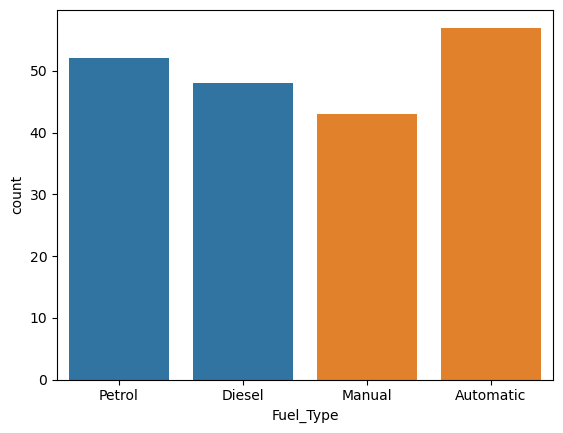

In [219]:
sns.countplot(data=cars_df, x='Fuel_Type')
sns.countplot(data=cars_df, x='Transmission')


In [220]:
fuel_codes = {'Diesel': 0, 'Petrol': 1}
cars_df['fuel'] = cars_df['Fuel_Type'].map(fuel_codes)
trans_codes = {'Automatic': 0, 'Manual': 1}
cars_df['transmission'] = cars_df['Transmission'].map(trans_codes)
cars_df.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,fuel,transmission
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000,1,1
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000,1,0
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000,1,0
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000,0,1
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000,0,0


In [221]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

ordenc = OrdinalEncoder(categories=[X_train["Brand"].unique()]) 
ordenc.fit(X_train[['Brand']])

X_train['Brand_Codes'] = ordenc.transform(X_train[['Brand']])
X_test['Brand_Codes'] = ordenc.transform(X_test[['Brand']])

Очікуваний результат після трансформацій:

In [222]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Owner_Type_Codes,Brand_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1.0,0.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0.0,1.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,0.0,1.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1.0,0.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1.0,2.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Owner_Type_Codes,Brand_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,2.0,10.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1.0,0.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,0.0,5.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,2.0,7.0


(None, None)

In [223]:
def categorize_model(model):
    sedans = ['Corolla','Civic','City','Verna','Elantra','A3','A4','A5','3 Series','5 Series','7 Series']
    suvs   = ['Creta','Harrier','Tiguan','Fortuner','Scorpio','Thar','X1','X3','X5','GLC','GLE','GLA','T-Roc','WR-V','BR-V','EcoSport','XUV300','Venue']
    hatchbacks = ['Swift','Figo','Polo','Tiago','Santro','Ameo','Altroz']
    others = ['Endeavour','Ranger','Innova','Innova Crysta','Safari','Aspire','Vitara','Camry']
    
    if model in sedans:
        return 'Sedan'
    elif model in suvs:
        return 'SUV'
    elif model in hatchbacks:
        return 'Hatchback'
    else:
        return 'Other'

X_train['Model_Group'] = X_train['Model'].apply(categorize_model)
X_test['Model_Group']  = X_test['Model'].apply(categorize_model)

ordenc = OrdinalEncoder(categories=[X_train["Model_Group"].unique()]) 
ordenc.fit(X_train[['Model_Group']])

X_train['Model_Group_Codes'] = ordenc.transform(X_train[['Model_Group']])
X_test['Model_Group_Codes'] = ordenc.transform(X_test[['Model_Group']])

Чат джпт допоміг, але зараз хоч бачу як робиться категоризація

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

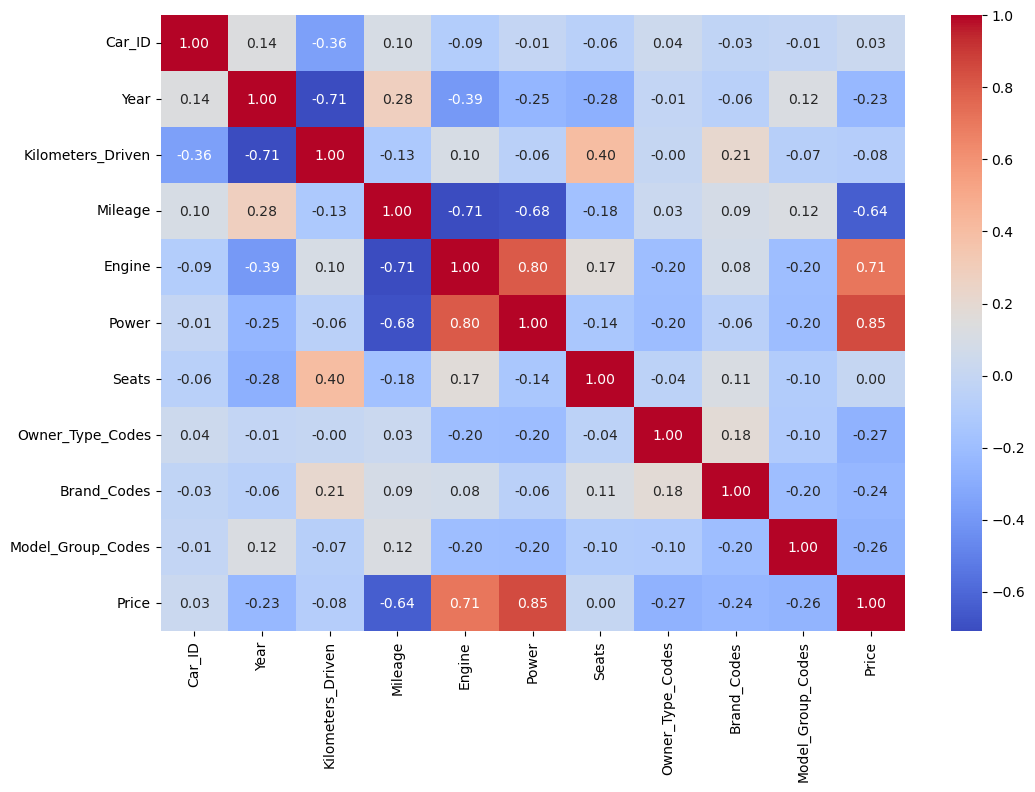

In [224]:

cor_data =pd.concat([X_train.select_dtypes(include='number'), y_train], axis=1)

plt.figure(figsize=(12,8))
sns.heatmap(cor_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

Найбільше корелюють із ціною Mielage 0.64, Engine 0.71, Power 0.85

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [225]:
X_train.drop(columns=[ 'Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Model_Group'], inplace=True)
X_test.drop(columns=[ 'Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Model_Group'], inplace=True)
X_train.head()


,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Owner_Type_Codes,Brand_Codes,Model_Group_Codes
83,84,2019,22000,18,1498,148,5,1.0,0.0,0.0
55,56,2018,28000,17,1968,187,5,0.0,1.0,1.0
26,27,2018,28000,15,1984,241,5,0.0,1.0,2.0
54,55,2017,32000,18,1598,103,5,1.0,0.0,2.0
19,20,2017,26000,12,1991,241,5,1.0,2.0,0.0


In [226]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
prediction_train = lin_reg.predict(X_train)
prediction_test = lin_reg.predict(X_test)

rmse_train= np.sqrt(np.mean((y_train - prediction_train) ** 2))
rmse_test = np.sqrt(np.mean((y_test - prediction_test) ** 2))
print("RMSE на тренувальних даних: ", rmse_train)
print("RMSE на тестових даних: ", rmse_test)
print(lin_reg.coef_,lin_reg.intercept_)

RMSE на тренувальних даних:  460176.8517341812
RMSE на тестових даних:  350105.25244400563
[ 3.87256702e+02 -7.34534998e+04 -1.34526067e+01 -2.20438805e+04
  2.24233682e+01  9.12991385e+03  1.62570161e+05 -1.42846307e+05
 -6.42453134e+04 -1.39105789e+05] 148843411.01732475


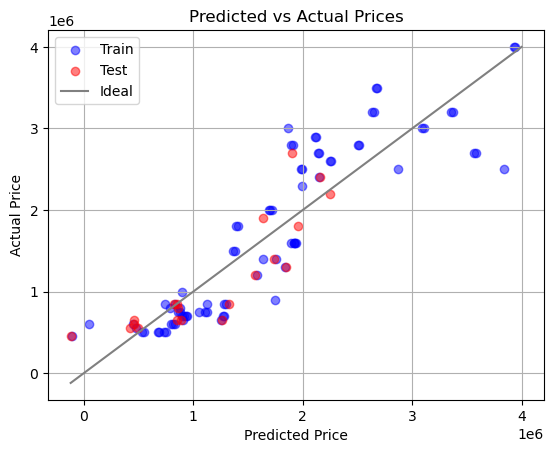

In [227]:
plt.scatter(prediction_train, y_train, color='blue', alpha=0.5, label='Train')
plt.scatter(prediction_test, y_test, color='red', alpha=0.5, label='Test')
max_val = max(max(y_train), max(y_test), max(prediction_train), max(prediction_test))
min_val = min(min(y_train), min(y_test), min(prediction_train), min(prediction_test))
plt.plot([min_val, max_val], [min_val, max_val], color='grey',  label='Ideal')

plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.grid(True)
plt.show()

точки передбачення наближені до діагоналі, але не надто ідеальні, розкидані так само як і точки тренувального сету

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [228]:
from sklearn.preprocessing import StandardScaler


In [229]:
scaler = StandardScaler()
scaler.fit(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = scaler.transform(X_train)


lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
prediction_train = lin_reg.predict(X_train_scaled)
prediction_test = lin_reg.predict(X_test_scaled)

rmse_train= np.sqrt(np.mean((y_train - prediction_train) ** 2))
rmse_test = np.sqrt(np.mean((y_test - prediction_test) ** 2))
print("RMSE на тренувальних даних: ", rmse_train)
print("RMSE на тестових даних: ", rmse_test)
print(lin_reg.coef_,lin_reg.intercept_)

RMSE на тренувальних даних:  460176.85173418105
RMSE на тестових даних:  350105.25244401535
[  10946.67290013  -82323.44206193 -123354.67776651  -75187.38737018
   14725.6888967   743387.49349838  120496.73539953  -93397.89235955
 -199495.34079167 -142445.53394415] 1680000.0000000033


In [230]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lin_reg.coef_
})

# Сортуємо за абсолютною величиною, щоб побачити найвпливовіші
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coef_df.head(10).round(2))  # 10 найсильніших ознак

             Feature  Coefficient  Abs_Coefficient
5              Power    743387.49        743387.49
8        Brand_Codes   -199495.34        199495.34
9  Model_Group_Codes   -142445.53        142445.53
2  Kilometers_Driven   -123354.68        123354.68
6              Seats    120496.74        120496.74
7   Owner_Type_Codes    -93397.89         93397.89
1               Year    -82323.44         82323.44
3            Mileage    -75187.39         75187.39
4             Engine     14725.69         14725.69
0             Car_ID     10946.67         10946.67


Oзнаки логічно впливають на ціну, наприклад Power чим більша тим більша ціна,Owner_Type_Codes  чим більше власників було тим менша ціна.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [231]:
model = sm.OLS(y_train,X_train)
results = model.fit()


In [232]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              120.3
Date:                Sat, 31 Jan 2026   Prob (F-statistic):                    5.41e-40
Time:                        14:49:15   Log-Likelihood:                         -1157.1
No. Observations:                  80   AIC:                                      2334.
Df Residuals:                      70   BIC:                                      2358.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Car_ID              843.6574   2125.442      0.397      0.693   -3395.403    5082.718
Year                 99.5435    451.100      0.221      0.826    -800.146     999.233
Kilometers_Driven    -6.2683      7.224     -0.868      0.389     -20.676       8.139
Mileage            -1.78e+04   2.62e+04     -0.679      0.500   -7.01e+04    3.45e+04
Engine               74.9627    170.219      0.440      0.661    -264.529     414.454
Power              9225.9719   1432.560      6.440      0.000    6368.821    1.21e+04
Seats              1.588e+05    9.5e+04      1.672      0.099   -3.06e+04    3.48e+05
Owner_Type_Codes  -1.259e+05   9.23e+04     -1.364      0.177    -3.1e+05    5.82e+04
Brand_Codes        -6.86e+04   1.96e+04     -3.493      0.001   -1.08e+05   -2.94e+04
Model_Group_Codes -1.395e+05   5.76e+04     -2.420      0.018   -2.54e+05   -2.45e+04
==============================================================================
Omnibus:                        0.207   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.902   Jarque-Bera (JB):                0.122
Skew:                           0.093   Prob(JB):                        0.941
Kurtosis:                       2.960   Cond. No.                     5.45e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ознаки Power, Brand_Codes, Model_Group_Codes є статистично значущими

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [233]:
model = sm.OLS(y_train,X_train.loc[:, ['Power','Model_Group_Codes','Brand_Codes']])
results_9 = model.fit()
results_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                              355.9
Date:                Sat, 31 Jan 2026   Prob (F-statistic):                    5.07e-45
Time:                        14:49:15   Log-Likelihood:                         -1165.1
No. Observations:                  80   AIC:                                      2336.
Df Residuals:                      77   BIC:                                      2343.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Power              1.154e+04    509.220     22.661      0.000    1.05e+04    1.26e+04
Model_Group_Codes -5.331e+04   4.72e+04     -1.129      0.262   -1.47e+05    4.07e+04
Brand_Codes       -4.471e+04   1.56e+04     -2.872      0.005   -7.57e+04   -1.37e+04
==============================================================================
Omnibus:                        9.501   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               12.387
Skew:                          -0.519   Prob(JB):                      0.00204
Kurtosis:                       4.625   Cond. No.                         151.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Показники змінилися але не сильно

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 8 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 8? Яку модель з останніх 3х завдань ви б лишили для використання?

In [234]:
col_p_025 = results.pvalues[results.pvalues < 0.25].index.tolist()
col_p_025

['Power', 'Seats', 'Owner_Type_Codes', 'Brand_Codes', 'Model_Group_Codes']

In [235]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
model = sm.OLS(y_train,X_train_scaled_df.loc[:, col_p_025])
results_10 = model.fit()
results_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.218
Model:                            OLS   Adj. R-squared (uncentered):              0.166
Method:                 Least Squares   F-statistic:                              4.186
Date:                Sat, 31 Jan 2026   Prob (F-statistic):                     0.00208
Time:                        14:49:15   Log-Likelihood:                         -1263.3
No. Observations:                  80   AIC:                                      2537.
Df Residuals:                      75   BIC:                                      2548.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Power               8.39e+05   2.15e+05      3.896      0.000     4.1e+05    1.27e+06
Seats              1.263e+05   2.07e+05      0.610      0.544   -2.86e+05    5.39e+05
Owner_Type_Codes  -7.184e+04   2.12e+05     -0.340      0.735   -4.93e+05     3.5e+05
Brand_Codes       -2.244e+05    2.1e+05     -1.069      0.288   -6.42e+05    1.94e+05
Model_Group_Codes -1.389e+05   2.14e+05     -0.649      0.518   -5.65e+05    2.88e+05
==============================================================================
Omnibus:                        0.288   Durbin-Watson:                   0.156
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.318
Skew:                           0.136   Prob(JB):                        0.853
Kurtosis:                       2.855   Cond. No.                         1.53
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Проаналізувавши показники моделей я б обрала першу модель так як R-squared найбльш наюлижене до 1 і якщо порівнювати її з показниками другої моделі то АІС і ВІС кращі в першої моделі. Третя модель має гарні показники Ф статистики і АІС і ВІС але дуже низький R-squared